<a href="https://colab.research.google.com/github/chsanabriam/Esatdistica_Aplicada/blob/master/Inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use("ggplot")

# Inferencia Estadística
Hasta ahora hemos visto como dado un modelo de probabilidad, podíamos calcular la probabilidad de que una variable tomara un cierto valor.

Ahora nos interesa el proceso inverso: una vez observada la frecuencia con la que la variable toma los valores, buscamos un modelo probabilístico que describa los datos. A esto se llama **inferencia estadística**.

La **inferencia estadística** trata básicamente con generalizaciones y predicciones. Por ejemplo, podemos afirmar, con base a opiniones de varias personas entrevistadas en Bogotá, que en las próximas elecciones municipales el 52% de los electores votará por el candidato A. En este caso tratamos con una muestra aleatoria de opiniones de una población finita muy grande.

En otro ejemplo, podemos afirmar que el costo promedio para construir una piscina está entre 4 y 4.5 millones de pesos, con base en las estimaciones de tres contratistas seleccionados al azar de 30 que construyen piscinas residenciales actualmente. La población que será muestreada aquí es finita pero muy pequeña.

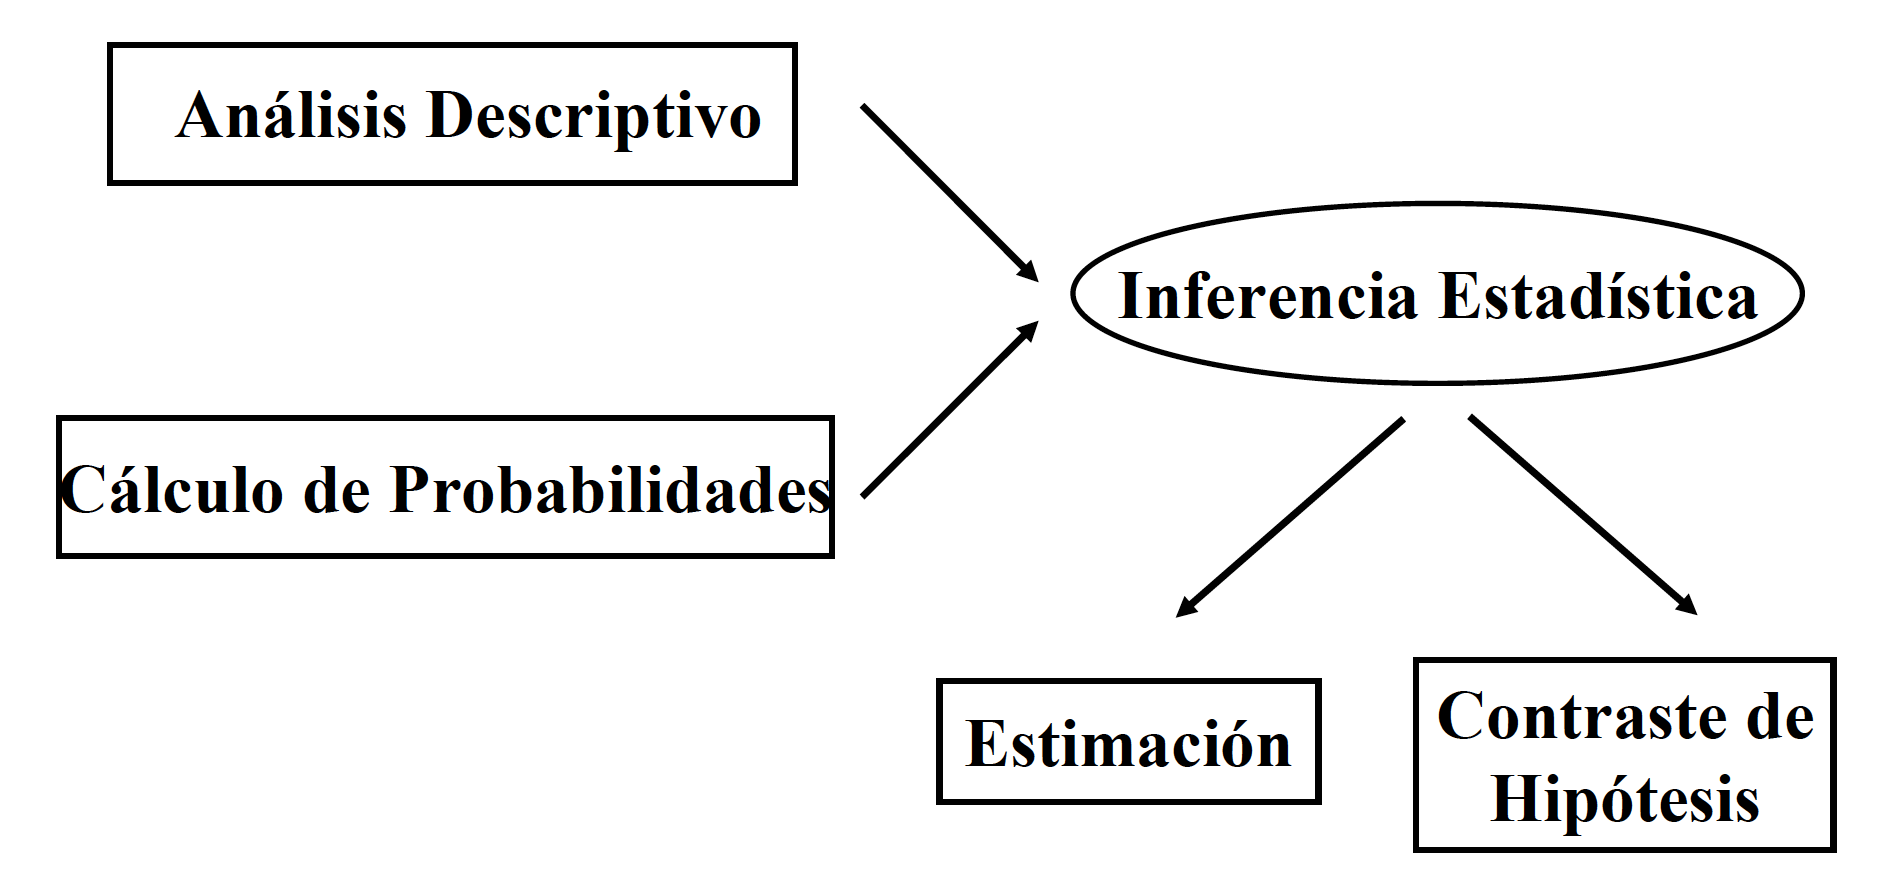

En cada uno de estos ejemplos calculamos una **estadística** a partir de una **muestra** seleccionada de la **población**, y de estas estadísticas hacemos varias afirmaciones con respecto a los valores de los parámetros de la población que pueden ser ciertos o no.

##Algunas definiciones
###Población
conjunto de referencia del que extraemos las observaciones, es decir, el conjunto de todas las posibles unidades experimentales. Por más que nos refiramos muchas veces a este concepto como población, este conjunto no tiene que ser necesariamente un grupo de personas o animales (pensemos en las variables cantidad de plomo en orina, procedimiento quirúrgico, visitas al
médico, tiempo hasta que muere una persona tras una operación).

###Muestra
subconjunto de elementos de la población que habitualmente utilizaremos para realizar un estudio estadístico. Se suelen tomar muestras cuando es difícil, imposible o costosa la observación de todos los elementos de la población estadística, es decir, su uso se debe a que frecuentemente la población es demasiado extensa para trabajar con
ella. El número de elementos que componen la muestra es a lo que
llamamos tamaño muestral y se suele representar por la letra minúscula $n$.

###Estadístico
Es una medida usada para describir alguna característica de una muestra (media, mediana, desviación típica,...) y un parámetro es una medida usada para describir las mismas características pero de la población
(media, mediana, desviación típica,...). Cuando el estadístico se calcula en
una muestra con idea de hacer inferencia sobre la misma característica en la población, se le llama estimador. La inferencia estadística pretende aproximarse a los parámetros de la población a partir de los estimadores de
la muestra.

* La **inferencia estadística** esta basada en el estudio de las muestras. 

* La muestra debe ser representativa de la población para extraer conclusiones validas sobre esta población. La muestra debe ser aleatoria.

###Muestreo Aleatorio
Es aquel procedimiento de selección de la muestra en el que todos y cada uno de los elementos de la población tiene una cierta probabilidad de
resultar elegidos. De esta forma, si tenemos una población de $N$ elementos y estamos interesados en obtener una muestra de $n$ elementos (muestra de tamaño $n$), cada subconjunto de $n$ elementos de la población tendrá también una cierta probabilidad de resultar la muestra elegida. 

####Muestreo Aleatorio Simple
Cada elemento de la población tiene la misma probabilidad de ser elegido para formar parte de la muestra y cada muestra del mismo tamaño tiene la misma probabilidad de ser seleccionada.

La técnica del muestreo puede
asimilarse a un modelo de extracción de bolas de una urna con devolución
(*reemplazamiento*) de la bola extraída. Un mismo dato puede, en consecuencia, resultar muestreado más de una vez. Cada elección no depende de las anteriores y, por tanto,
los datos muestrales serán **independientes**.

#### Ejemplo en poblaciones finitas
En un instituto se quiere realizar un estudio sobre el nivel de colesterol de los alumnos. Para ello, se decide
extraer una muestra aleatoria simple de tamaño 10.

* Población $\to$ alumnos del instituto.
* Variable aleatoria $X$ $\to$ nivel de colesterol.
* Muestra aleatoria simple de tamaño 10 $\to$ *variables aleatorias* $x_1, x_2, x_3, \ldots, x_{10}$, con $x_i$ el nivel de colesterol del i-ésimo alumno seleccionado.

Se seleccionan 10 alumnos y sus niveles de colesterol son:
129, 170, 135, 140, 225, 163, 131, 203, 187, 149.

Por lo tanto los valores observados de las variables aleatorias son:

$x_1 = 129$, $x_2=170$, $x_3=135$, $x_4=140$, $x_5=225$, $x_6=163$, $x_7=131$, $x_8=203$, $x_9=187$ y $x_{10}=149$.

#### Ejemplo en poblaciones infinitas
Se analizan muestras de agua de un río para estudiar el índice de diversidad de especies. Este índice se utiliza para medir el efecto de una perturbación, como la contaminación del agua, en seres vivos. Puede determinarse la diversidad de la población antes y después de la perturbación. Si el índice tras la perturbación es
mucho mas pequeño indica que la perturbación ha tenido efectos negativos. Para esto, se decide extraer una muestra aleatoria simple de tamaño 8.

* Población $\to$ posible análisis del agua.
* Variable aleatoria $X$ $\to$ índice de diversidad.
* Muestra aleatoria simple de tamaño 8 $\to$ *variables aleatorias* $x_1, x_2, x_3, \ldots, x_8$, con $x_i$ el índice de diversidad del i-ésimo análisis realizado.

Se realizan 8 análisis y sus índices de diversidad son: 1.92; 1.87; 1.35; 1.48; 2.13; 1.85; 2.07; 1.98.

Por lo tanto los valores observados de las variables aleatorias son:

$x_1 = 1.92$, $x_2=1.87$, $x_3=1.35$, $x_4=1.48$, $x_5=2.13$, $x_6=1.85$, $x_7=2.07$ y $x_8=1.98$.



###Distribución muestral
Por tanto, cada dato muestral será una variable aleatoria que
tendrá asociada una función de probabilidad $f(x)$ según una
determinada distribución que llamaremos distribución de la población y recorrerá todos los posibles valores de la población.
Si trabajamos con un muestreo aleatorio simple (M.A.S.), cada dato muestral será independiente de los demás y por tanto la función de
probabilidad conjunta de la muestra será:
$$f(x) = f ( x_1 ,x_2 ,x_3 ,x_4, \ldots ,x_n ) =f(x_1)\cdot f(x_2)\cdot f(x_3 )\cdots f(x_n)$$

por ser las $x_j$ variables aleatorias independientes.



##Estadístico
*“Una función de los valores de la
muestra”*. Es una variable aleatoria, cuyos valores dependen de la muestra seleccionada. Su distribución de
probabilidad, se conoce como *“Distribución muestral del
estadístico”*.

Sea una población donde se observa la variable aleatoria $X$. Esta variable $X$, tendrá una distribución de probabilidad, que puede ser conocida o desconocida, y ciertas características o parámetros poblacionales.

Sea una población donde se observa la variable aleatoria $X$. La esperanza y la varianza son:
$$E(X) = \mu \quad \text{y} \quad Var(X) = \sigma^2$$

Consideramos una muestra aleatoria simple, m.a.s., de tamaño $n$, formada por las v.a. $x_1, x_2,\ldots,x_n$.

Definimos los siguientes estadísticos muestrales:
* Media muestral
$$\bar{x} = \frac{x_1+x_2+\ldots+x_n}{n}$$
* Varianza muestral
$$\sigma^2 = \frac{\sum_{i=1}^{n}\left(x_i - \bar{x}\right)^2}{n}$$
* Cuasi-Varianza muestral
$$S^2 = \frac{\sum_{i=1}^{n}\left(x_i - \bar{x}\right)^2}{n-1}$$

Consideramos todas las posibles muestras de tamaño n


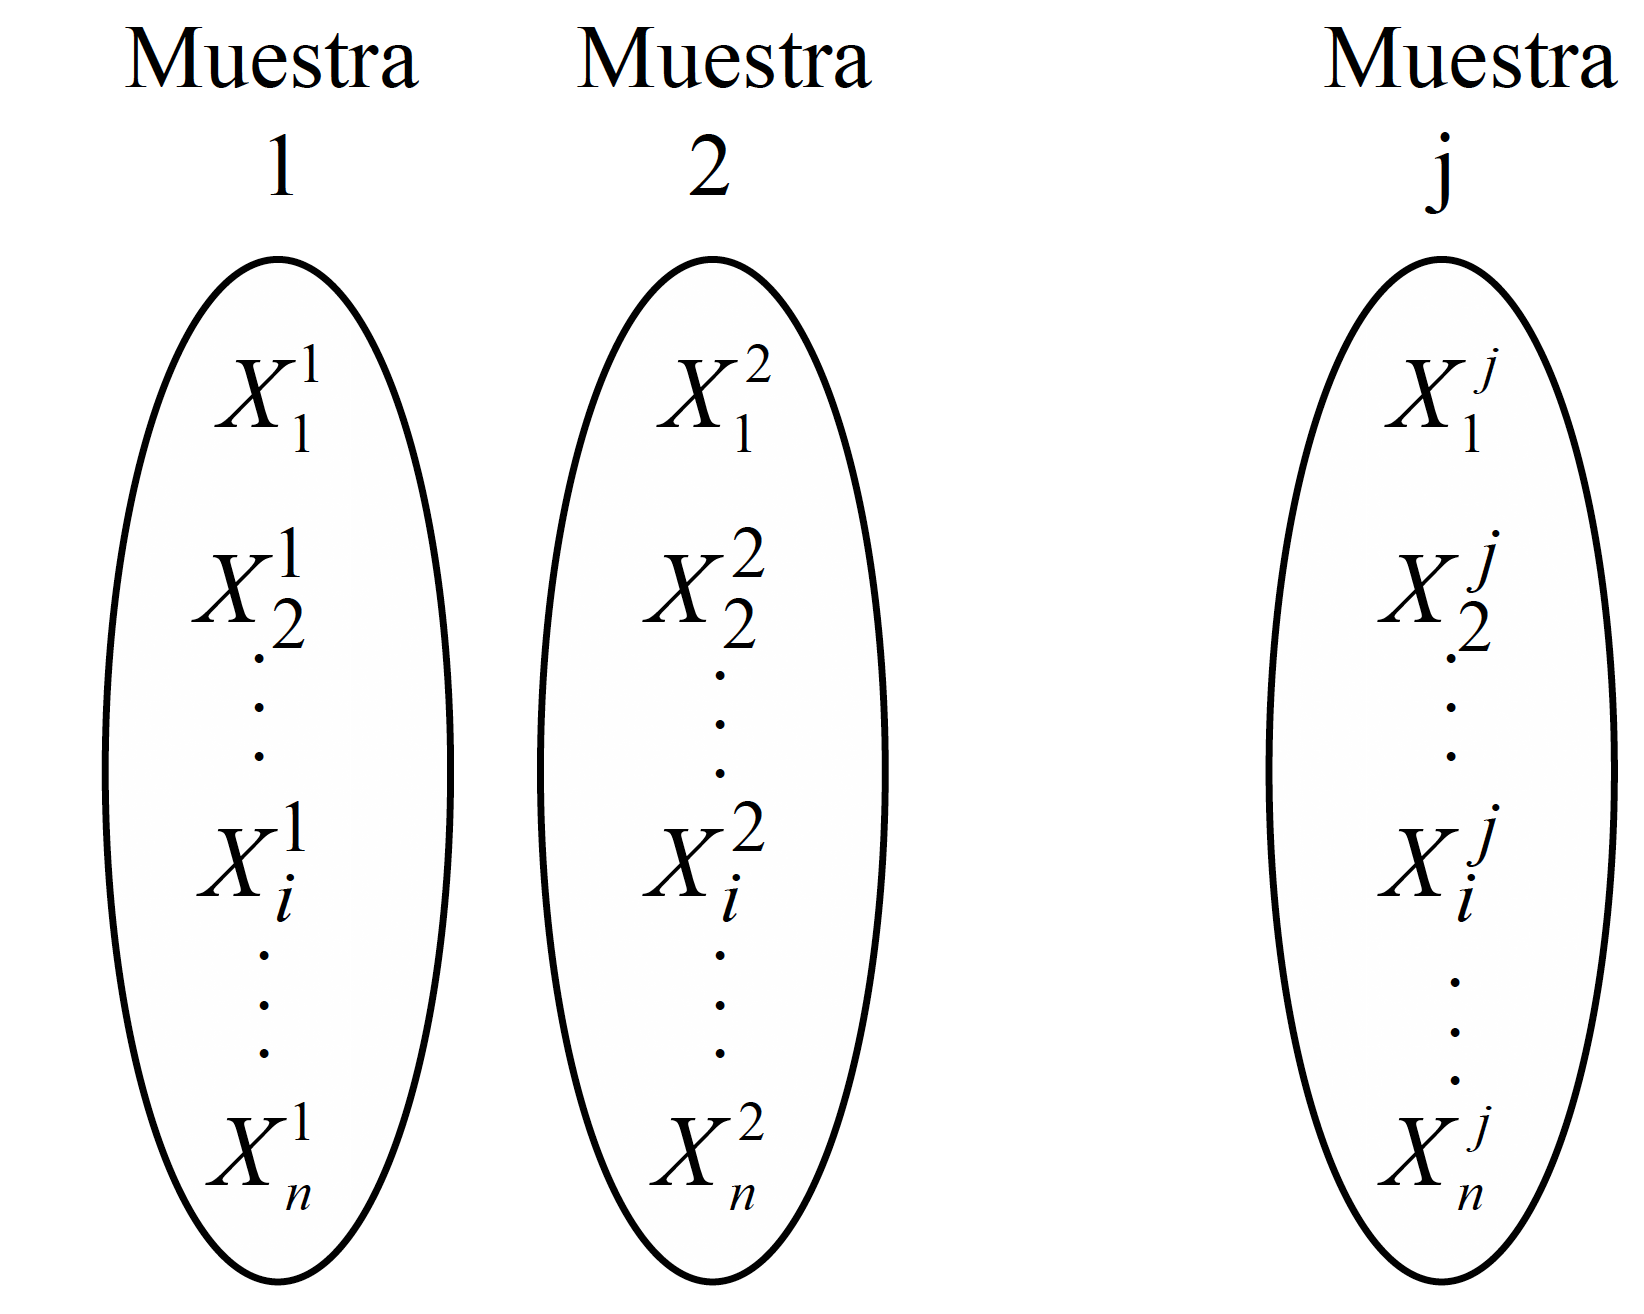

La variable aleatoria $\bar{X}$ toma los valores: $\bar{x_1}, \bar{x_2} ,\ldots, \bar{x_j}$ y su distribución de probabilidad es conocida como "*Distribución de la media muestral*" y tiene valores de esperanza y varianza son:
$$E(\bar{X}) = \mu_{\bar{x}} \quad \text{y} \quad Var(X) = \sigma^2_{\bar{x}}$$ 

Los estadísticos muestrales, media, varianza y cuasi-varianza verifican las siguientes propiedades.
* Media muestral
$$E(\bar{X}) = \mu_{\bar{x}} = \mu$$
$$Var(\bar{X}) = \sigma^2_{\bar{x}} = \frac{\sigma^2}{n}$$
* Varianza muestral
$$E(X) = \frac{n-1}{n}\sigma^2$$
* Cuasi-varianza muestral
$$E(S^2) = \sigma^2$$

**Estas propiedades se verifican siempre, cualquiera que sea la distribución de la variable X**

####Ejemplo en poblaciones infinitas
Sea una v.a. $X$ con valores: $1, 3, 5$. Consideramos una m.a.s. de tamaño 2. Obtener:

1. Media y varianza de la v.a $X$
2. Media y varianza de la v.a $\bar{X}$



1. En el caso de $X$ la distribución es uniforme.

| x |P(x) |
|---|-----|
|1  | 1/3 |
|3  | 1/3 |
|5  | 1/3 |

$$\mu = E(X) = \sum_{i=1}^{3} x_if(x_i) = 3$$
$$\sigma^2 = \sum_{i=1}^{3}(x_i - \mu)^2f(x_i) = \frac{8}{3}$$

2. En este caso debemos encontrar todas las posibles combinaciones de muestras de tamaño 2 con los valores 1,3 y 5. Luego sacar el promedio para cada par de números.

In [ ]:
# Calcule la tabla de posibles combinaciones de (x1,x2), es decir todas 
# las posibles muestras de tamaño 2 con los números 1,3 y 5


In [ ]:
#Para cada muestra guarde el valor promedio en el vector xprom


In [ ]:
# Para cada valor de xprom calcule su probabilidad y guardelo en el vector
# prob


In [ ]:
#Ahora con estos vectores encuentre el valor de la media muestral
# y la varianza muestral
 

##Métodos de la inferencia
Dado un fenómeno aleatorio sobre el cual queremos estudiar ciertos aspectos, construimos una v.a. $X$ y una m.a.s. $x_1, x_2, \ldots, x_n$. Nos propondremos por lo general determinar la naturaleza aleatoria del fenómeno y por tanto, inferir cuál es la ley de probabilidades que modela a la v.a. $X$. Se dan varios
casos:

(a) Cuando no sabemos nada sobre la función de distribución $f(x)$.

(b) Cuando se sabe que $f(X)$ pertenece a cierta familia o clase de distribuciones pero se desconoce un parámetro, que en adelante denotaremos por $\theta$, del cual depende la distribución de probabilidad. Por ejemplo, se sabe que
$X \approx B(1, \theta)$ pero $\theta$ no se conoce, sólo se sabe que $\theta \in \Theta$ (a $\Theta$ se le llama espacio paramétrico). Nuestro objetivo es determinar de alguna manera este parámetro $\theta$.

El tipo de inferencia estadística que practicaremos recibe el nombre de Inferencia Paramétrica (estimación de parámetros). Los métodos que proponemos para obtener información sobre $\theta$ son los siguientes:

(i) **Estimación puntual:** consiste en obtener un valor numérico que aproxime al valor real del parámetro $\theta$. Los más interesantes son el método de los momentos y el de la máxima verosimilitud.

(ii) **Estimación por intervalo (intervalos de confianza):** consiste en la construcción de un intervalo $I= [θ_1^*, θ_2^*]$ de forma que la probabilidad de que $\theta$ pertenezca a $I$ sea grande y a su vez la longitud de dicho intervalo sea
pequeña.

(iii) **Contrastación de Hipótesis:** consiste en emitir una conjetura sobre $\theta$ para más tarde, y en base a una serie de reglas y una muestra, dilucidar si tal conjetura es o no aceptable.


###Ejemplo
Una planta industrial envasa detergente en polvo en paquetes que se etiquetan con: CONTENIDO 4 Kg.

El proceso viene siguiendo un patrón normal y se considera bajo control mientras cumpla: $\mu=4.01$ Kg. y $\sigma=0.005$ Kg.

Pero el proceso se puede desajustar (aumento o disminución de $\mu$ o $\sigma$, aparición de asimetría, etc.) e interesa poder chequear en cualquier momento el estado del proceso de envasado.

La Estadística Inferencial aporta herramientas para dar respuesta a preguntas naturales como éstas:
1. ¿Cuánto valen $\mu$ y $\sigma$ (ESTIMACIÓN PUNTUAL)
2. ¿Entre qué valores se encuentran $\mu$ y $\sigma$ con ciertas garantías de acierto (95% ó 99%)?
(ESTIMACIÓN por INTERVALOS DE CONFIANZA)

##Estimadores
Son estadísticos independientes de los parámetros de la población, y que se utilizan para aproximarlos. Si $\theta$ es el parámetro de interés, el estimador se denotará por $\hat{\theta}$. En el caso de una población
Normal, podemos considerar la media muestral como estimador de la media poblacional (es decir, $\bar{X} = \hat{\mu})$ y la varianza muestral como estimador de la varianza poblacional ($s^2 = \hat{\sigma}^2$).
 
Para una distribución $Bi(m, p)$,
donde m denota el número de pruebas de Bernoulli, la proporción $p$ se puede estimar a partir de la
proporción poblacional (que denotaremos por $\hat{p}$). Por tanto, $\bar{X}$, $s^2$ y $\hat{p}$ son estimadores puntuales de $\mu$, $\sigma^2$ (en distribución Normal) y $p$ (en distribución Binomial), respectivamente.
###Propiedades de los estimadores
####Estimadores insesgados
Un estimador debe estar *“próximo”* en algún sentido al valor verdadero del parámetro desconocido. De manera formal, se dice que $\hat{\theta}$ es un estimador insesgado de $\theta$ si el valor esperado de $\hat{\theta}$ es igual a $\theta$ . Esto equivale a afirmar que la media de la distribución de probabilidad de $\hat{\theta}$ (o la media de la distribución de muestreo de $\hat{\theta}$) es igual a $\theta$.

Un estimador $\hat{\theta}$ es un **estimador insesgado** para estimar a $\theta$ si
$$E(\hat{\theta}) = \theta$$
Si el estimador no es insesgado, entonces la diferencia
$$E(\hat{\theta}) - \theta$$
es conocido como **sesgo** del estimador $\hat{\theta}$.

###Métodos de construcción de estimadores
Veamos los dos métodos generales, de amplio espectro, de construcción de estimadores: método de momentos y método de máxima verosimilitud.

####Método de momentos
La idea de este método es natural, y se basa en que, dada una muestra ($x_1,\ldots,x_n$) de la variable $X$ que sigue una distribución dada por $f(x; \theta)$, 
* La media muestral $x$ “debe parecerse” a la media poblacional $E_{\theta}(X)$ (la esperanza de $X$ si se diera el parámetro $\theta$). 
* La media poblacional $E_{\theta}(X)$ es de hecho una función de $\theta$. 

“Por consiguiente”: 
* planteamos la ecuación (con incógnita $\theta$)
$$E_{\theta}(X) = \bar{x},$$
* despejamos $\theta$ de la ecuación,
* ésta es la estimación por momentos de $\theta$, a la que nombramos como $\hat{\theta}$.

####Ejemplo
Digamos que tenemos la
siguiente muestra de tamaño 8 de una $X \sim Ber(p)$:
$$\{0,1,1,0,1,1,1,0\}$$
* Muestre que la media muestral es 5/8

In [ ]:
#Escriba su código aquí


Por otro lado dado que $E_{\theta}=p$. De manera que planteamos la ecuación
$$p=\frac{5}{8}$$
cuya solución es $\hat{p} = 5/8$. Esta sería la estimación de $p$ por momentos para la muestra dada.

####Ejercicio
Genere 10 muestras de tamaño 8 y para cada una de ellas calcule el valor de $p$. A partir de lo anterior responda la siguiente pregunta: ¿La estimación obtenida de $p$ depende de la muestra?

In [ ]:
#Escriba su código aquí


####Ejemplo 
Por ejemplo, tenemos una muestra de una v.a. geométrica: $3,0,2,0,1,5,2,5,15,1$. El valor promedio de la muestra es: 

In [ ]:
#Escriba aquí su código


Ahora la estimación de $p$ por el método de los momentos es:
$E(X) = \frac{1}{n}\sum_{i=1}^{n}x_i$

In [ ]:
#Escriba su código aquí para encontrar p


Los momentos están relacionados con los parámetros de la distribución
asociada.

Dada una muestra aleatoria $x_1, x_2, x_3, \ldots, x_n$, el momento muestral de orden $k$ es:
$$\frac{1}{n}\sum_{i=1}^{n}x_i^k$$

Sea $x_1, x_2, x_3, \ldots, x_n$ una m.a. de una distribución con función de probabilidad puntual o función de densidad que depende de m parámetros $\theta_1, \theta_2, \theta_3, \ldots, \theta_n$ . Los estimadores de momentos de $\theta_1, \theta_2, \theta_3, \ldots, \theta_n$ son los valores $\hat{\theta}_1, \hat{\theta}_2, \hat{\theta}_3, \ldots, \hat{\theta}_n$ que se obtienen
igualando $m$ momentos poblacionales con los correspondientes momentos muestrales. En general, se obtienen resolviendo el siguiente sistema de ecuaciones

$$\frac{1}{n}\sum_{i=1}^{n}x_i^k = E(X^k)\quad k=1,2,\ldots ,m$$

####Ejemplo
Sea $x_1, x_2, x_3, \ldots, x_n$ una m.a. de una distribución $\Gamma (\alpha, \lambda)$. Como hay dos parámetros a estimar, planteamos un sistema de ecuaciones basadas en el primer y en el segundo momento.

Dado que $X \sim \Gamma (\alpha, \lambda)$, entonces $E(X) = \frac{\alpha}{\lambda}$ y $V(X) = \frac{\alpha}{\lambda^2}$ y la relación $V(X) = E(X^2) - (E(X))^2$

$$
\left \{ \begin{matrix} \frac{1}{n} \sum_{i=1}^{n}x_i = E(X), & \mbox{entonces } \frac{1}{n} \sum_{i=1}^{n}x_i = \frac{\alpha}{\lambda}\\
\frac{1}{n} \sum_{i=1}^{n}x_i^2 = E(X^2), & \mbox{entonces } \frac{1}{n} \sum_{i=1}^{n}x_i^2 = {\alpha}{\lambda^2} + \left(\frac{\alpha}{\lambda} \right)^2
\end{matrix}\right.
$$

Reemplazando $\frac{\alpha}{\lambda} = \bar{X}$, en la segunda ecuación
$$\frac{1}{n}\sum_{i=1}^n x_i^2 = \frac{\bar{X}}{\lambda} + \bar{X}^2$$
Despejando $\lambda$
$$\hat{\lambda} = \frac{\bar{X}}{\frac{\sum_{i=1}^{n}x_i^2}{n}-\bar{X}^2}$$
Y reemplazando el estimador de $\lambda$ en la primera ecuación obtenemos el estimador de $\alpha$
$$\hat{\alpha} = \frac{\bar{X}^2}{\frac{\sum_{i=1}^{n}x_i^2}{n} - \bar{X}^2}$$

####Ejercicio
Sea $X_1,X_2,\ldots,X_{50}$ una muestra aleatoria de una distribución exponencial de parámetro $b$ desconocido. A partir de la muestra estimar el parámetro $b$.


In [ ]:
X = [2.51005034, 2.60382829, 2.69760625, 2.7913842 , 2.88516216,
       2.97894012, 3.07271807, 3.16649603, 3.26027398, 3.35405194,
       3.4478299 , 3.54160785, 3.63538581, 3.72916377, 3.82294172,
       3.91671968, 4.01049763, 4.10427559, 4.19805355, 4.2918315 ,
       4.38560946, 4.47938741, 4.57316537, 4.66694333, 4.76072128,
       4.85449924, 4.9482772 , 5.04205515, 5.13583311, 5.22961106,
       5.32338902, 5.41716698, 5.51094493, 5.60472289, 5.69850084,
       5.7922788 , 5.88605676, 5.97983471, 6.07361267, 6.16739062,
       6.26116858, 6.35494654, 6.44872449, 6.54250245, 6.63628041,
       6.73005836, 6.82383632, 6.91761427, 7.01139223, 7.10517019]
#Escriba su código aquí


####Ejercicio
Sea $X_1,X_2,\ldots,X_{50}$ una muestra aleatoria de una distribución uniforme de parámetros $a,b$ desconocidos. A partir de la muestra estimar los parámetro $a,b$.

In [ ]:
X = [1.025, 1.075, 1.125, 1.175, 1.225, 1.275, 1.325, 1.375, 1.425,
       1.475, 1.525, 1.575, 1.625, 1.675, 1.725, 1.775, 1.825, 1.875,
       1.925, 1.975, 2.025, 2.075, 2.125, 2.175, 2.225, 2.275, 2.325,
       2.375, 2.425, 2.475, 2.525, 2.575, 2.625, 2.675, 2.725, 2.775,
       2.825, 2.875, 2.925, 2.975, 3.025, 3.075, 3.125, 3.175, 3.225,
       3.275, 3.325, 3.375, 3.425, 3.475]
#Escriba su código aquí


####Método de máxima verosimilitud
Este método fue introducido por Fisher en la década de 1920. Se basa en la idea de, dada una muestra, hallar los valores de los parámetros
que hacen que la probabilidad de obtener dicha muestra sea máxima.

####Ejemplo
Se realiza una encuesta de opinión a una m.a. de 20 personas. Se les formula una única pregunta que será respondida por Si o por NO. Sean $x_1, x_2, \ldots,x_{20}$ las v.a.
correspondientes a la respuesta, tales que
$$x_i = \left\{
  \begin{matrix}
  1 & \mbox{si la persona $i$ responde SI}\\
  0 & \mbox{si la persona $i$ responde NO}
  \end{matrix}
  \right.$$
para $i = 1,2,\ldots,20$ y sea $p=P(X_i=1)$.

Observemos que las v.a. $X_i$ son independientes y cada una de ellas tiene distribución $Bi(1,p)$. Entonces, la función de probabilidad conjunta del vector $(x_1,x_2, \ldots, x_{20})$ es
$$p(x_1,x_2,\ldots,x_{20}) = p^{x_1}(1-p)^{1-x_1}p^{x_2}(1-p)^{1-x_2}\ldots p^{x_{20}}(1-p)^{1-x_{20}}$$
Si en la muestra obtenida se observan 7 NO’s (0) y 13 SI’s (1), sería
$$p(x_1,x_2,\ldots,x_{20}) = p^{13}(1-p)^{7}$$
La pregunta es: ¿qué valor de $p$ hace que los valores muestrales obtenidos sean los más probables?

Es decir, buscamos el valor de p que hace máxima $p(x_1,x_2,\ldots,x_{20})$ o equivalentemente $\ln p(x_1,x_2,\ldots,x_{20})$ ya que ln es una función monótona creciente. Debemos maximizar la siguiente función de $p$
$$g(p) = \ln p(x_1,x_2,\ldots,x_{20}) = 13\ln(p) + 7\ln(1-p)$$

Para ello, como esta función es derivable respecto de $p$, buscamos los posibles puntos críticos, igualando a 0 la derivada primera.

$$0 = \frac{\partial g(p)}{\partial p} = \frac{13}{p} - \frac{7}{1-p} = \frac{13(1-p)-7p}{p(1-p)} = \frac{13-20p}{p(1-p)} \iff 13-20p = 0 \iff \hat{p} = \frac{13}{20}$$

Este valor es en efecto el que maximiza $g(p)$ pues
$$\frac{\partial^2g(p)}{\partial p^2}\bigg|_{p=13/20} = -\frac{13}{p^2}-\frac{7}{(1-p)^2}\bigg|_{p=13/20} < 0$$ 

En general se puede escribir la función $g(p)$ como:

$$g(p) = S\ln(p) + (n-S)\ln(1-p)$$

####Ejercicio
A partir de la formula anterior construya una función que calcule la verosimilitud para cualquier valor de $S$ y de $n$

In [ ]:
#Escriba su código aquí


Con la función anterior grafique $g(p)$ vs $p$ y encuentre gráficamente el valor de $p$ que máximiza $g(p)$ para los valores de $S=13$ y $n=20$.

In [ ]:
#Escriba su código aquí


####Ejercicio
Sea X una variable aleatoria igual al número de clientes que solicitan información a una
empresa constructora durante un día. Se quiere saber el número esperado de clientes que
solicitan información en un día y para esto se tomó una muestra aleatoria durante 50 días
de la cantidad de clientes que llegaron por día, obteniéndose: 

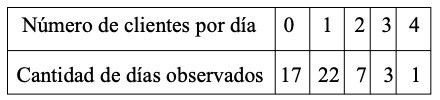

Además se sabe que la función de probabilidad de esta variable aleatoria es Poisson($\lambda$).
Con base en los datos, encuentre el estimador de máxima verosimilitud de la probabilidad de que no hayan clientes en un día. 

In [ ]:
#Escriba su código aquí


###Estimación de intervalos de confianza
Dijimos que realizar una estimación puntual es asignarle al parámetro desconocido un valor, o sea
un número. 

Obtener una estimación (puntual) de un parámetro es insuficiente:
* No calibramos el error que podemos estar cometiendo.
* Si obtenemos otra estimación basada en otra muestra, el valor será diferente: ¿Cuál es mejor?
* La probabilidad de “acertar” en una estimación puntual con un estimador $\hat{\theta}$ es frecuentemente 0.
Siempre que la distribución del estimador $\hat{\theta}$ sea continua se tiene
$$P\mbox{(Acertar con la estimación puntutal)} = P(\hat{\theta}=\theta) = 0$$
Es mucho más informativo un intervalo de valores que cubra el verdadero valor del parámetro con
una cierta garantía.

Unas veces tendremos éxito (el intervalo contendrá al verdadero valor del parámetro a estimar, que es
un valor fijo pero desconocido) y otras no.

Construiremos este intervalo a partir de la muestra, y sus extremos serán por tanto aleatorios.

Utilizamos un procedimiento de construcción que asegure una alta probabilidad de éxito; es decir, de
que el intervalo construido cubra realmente al valor del parámetro desconocido. 

Llamamos **confianza** o **garantía** a esa probabilidad de éxito y suele expresarse en $\%$.

Puede lograrse tan cercana al 100$\%$ como requiera cada situación, pero a costa de aumentar la amplitud del intervalo y perdiendo por lo tanto precisión. 

* La confianza o garantía de éxito la fija el investigador: $1-\alpha$ ó bien $100\cdot (1-\alpha)\%$. Habitualmente se usan valores altos, del $95\%$ ó $99\%$.
* El riesgo de error es el valor complementario $\alpha$ ($100 \cdot \alpha\%$); queda también fijado.
Será pequeño; habitualmente del $5\%$ ó $1\%$.

####Ejemplo
Para estimar un parámetro de una variable crítica para el funcionamiento de una central
nuclear nos interesará que $\alpha$ sea muy pequeño, $\alpha=0.001$ por ejemplo. En otras ocasiones, como por
ejemplo la estimación de un parámetro que afecte a la longitud de las piezas producidas por una
máquina, donde las consecuencias de un posible error no serían tan graves, se podrá admitir un
mayor riesgo de error, por ejemplo $\alpha=0.05$. 

Estos intervalos de valores se obtienen a partir de la distribución muestral del estimador usado y se
llamarán Intervalos de Confianza. De forma análoga se construyen cotas de confianza (inferiores o superiores).

#### Intervalos y cotas de confianza
* $X$ variable aleatoria de interés definida sobre la población.
* $\theta$ parámetro de interés desconocido de la población (de la distribución de la variable $X$).
* $X_1,X_2,\ldots,X_n$ muestra aleatoria simple representativa de la población.
* $\alpha \in (0,1)$ el cual es fijado de antemano.

**Intervalo de confianza** del $100 \cdot (1-\alpha)\%$ para $\theta$, es un intervalo formado por dos estadísticos $L$ y $U$, con $L = L(X_1,X_2,\ldots,X_n)$ y $U =U(X_1,X_2,\ldots,X_n)$, tal que
$$P_{\theta}(L(X_1,X_2,\ldots,X_n) \leq \theta \leq U(X_1,X_2,\ldots,X_n)) = 1 -\alpha$$

**Cota superior de confianza** del $100\cdot(1-\alpha)\%$ para $\theta$, viene definida por un estadístico $U = U(X_1,X_2,\ldots,X_n)$, tal que $P_{\theta}(\theta \leq U(X_1,X_2,\ldots,X_n)) = 1 - \alpha$.

**Cota inferior de confianza** del $100\cdot(1-\alpha)\%$ para $\theta$, viene definida por un estadístico $L = L(X_1,X_2,\ldots,X_n)$, tal que $P_{\theta}(\theta \geq L(X_1,X_2,\ldots,X_n)) = 1 - \alpha$.

Los intervalos y cotas de confianza, además de depender de la muestra, también dependen de la confianza $1-\alpha$ con la que queremos trabajar.

Los extremos de los intervalos y cotas de confianza son aleatorios por ser función de la muestra.
Dada una muestra concreta $X_1,X_2,\ldots,X_n) = (x_1,x_2,\ldots,x_n)$ (datos), calcularemos los valores de $L$ y $U$
$$L(x_1,x_2,\ldots,x_n) = l, \quad U(x_1,x_2,\ldots,x_n)=u$$
y concluiremos que
$$\theta \in (l,u), \quad\mbox{ ó } \quad l\leq \theta\leq u, \quad\mbox{ con confianza }1-\alpha$$

Una vez calculados los extremos $L=l$ y $U=u$ a partir de los datos, no hablaremos de probabilidad.
Decir $P[\theta \in (l,u)] = 1 -\alpha$ no tiene sentido ya que el parámetro $\theta$ no es una v. a. sino una cantidad desconocida pero fija. Entonces, calculado el intervalo $(l,u)$, puede ocurrir:
* Exito: Hemos acertado y el intervalo contiene al parámetro, o bien.
* Fracaso: Hemos fallado y no lo contiene.

“Confiamos” en haber acertado ya que $(L,U)$ satisface $P_{\theta}(L(X_1,\ldots,X_n) \leq X \leq U(X_1,\ldots,X_n)) = 1 - \alpha$ (alto).

Si se repitiera muchas veces el muestreo y el cálculo del intervalo $(l,u)$, en promedio una proporción
($1 - \alpha$) o ($100\cdot(1-\alpha)\%$) de las veces el I.C. contendría al parámetro $\theta$. La proporción restante $\alpha$ fallaría.

Esto lo indicamos diciendo que el I.C. tiene una confianza (o garantía) $1 - \alpha$.

Esta interpretación frecuentista de los IC sirve también para las cotas de confianza.



####Confianza y amplitud (precisión) de un intervalo de confianza

La utilidad práctica de un intervalo viene dada por dos medidas:
1. CONFIANZA: Mide la seguridad o garantía del procedimiento de construcción del intervalo.
2. AMPLITUD: Mide (inversamente) la precisión de la estimación realizada.

A la hora de valorar un I.C. hay que tener en cuenta que nos interesa:
* Que la confianza sea lo más alta posible. (Por ejemplo, preferiríamos 95% a 90%).
* Que la amplitud sea lo menor posible. (P. ej., preferiríamos $2.995 \leq \theta \leq 3.005$ a $2.95 \leq \theta \theta 3.05$)

Ambos criterios entran en conflicto:
* Confianza y amplitud **no se pueden controlar a la vez** para un tamaño de muestra dado. Una característica de los I.C. es que **si aumenta la confianza aumenta la amplitud** (disminuye la precisión).
* Se consigue una confianza y amplitud prefijadas eligiendo el tamaño muestral adecuado.

A la amplitud se le suele llamar también “error máximo de estimación” 

####Método para construir intervalos y cotas de confianza
El método general sigue los siguientes pasos: 
1. Elegir un buen estimador $\hat{\theta}$ del parámetro $\theta$.
2. Obtener la distribución del estimador $\hat{\theta}$.
3. Delimitar una región de probabilidad $1-\alpha$ bajo esta distribución.
4. Despejar $\theta$.

####Aplicación a la obtención de un I.C para $\mu$ en el modelo $N(\mu, \sigma)$ con $\sigma$ conocida

1. Estimador $\hat{\mu} = \bar{X}$
2. Distribución del estimador
$$\bar{X} \to N(\mu, \sigma /\sqrt{n}) \implies \frac{\bar{X} - \mu}{\sigma /\sqrt{n}} \to N(0,1)$$
3. Región de probablidad $1 - \alpha$ bajo la distribución muestral

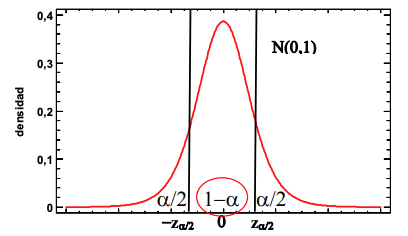

$$P\left(-Z_{\alpha /2} \leq \frac{\bar{X} - \mu}{\sigma /\sqrt{n}} \leq Z_{\alpha /2} \right) = 1 - \alpha$$

Donde $Z_{\alpha /2}$ es el valor de la normal estándar tal que el área a la derecha de dicho valor es $\alpha /2$

4. Despejar el parámetro $\mu$:
$$\bar{X}-Z_{\alpha /2}\frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{X}+Z_{\alpha /2}\frac{\sigma}{\sqrt{n}} \quad \mbox{o bien }$$ 
$$\mu \in \bar{X} \pm Z_{\alpha /2}\frac{\sigma}{\sqrt{n}} \quad \mbox{ con confianza $1 - \alpha$}$$


Para obtener cotas de confianza dejamos todo el riesgo de error $\alpha$ en una cola:

* Cota inferior de confianza $1 - \alpha$:
$$P\left(\frac{\bar{X} - \mu}{\sigma /\sqrt{n}} \leq Z_{\alpha} \right) = 1 - \alpha \implies \mu \geq \bar{X} - Z_{\alpha}\frac{\sigma}{\sqrt{n}}$$
* Cota superior de confianza $1 - \alpha$
$$P\left(\frac{\bar{X} - \mu}{\sigma /\sqrt{n}} \geq Z_{\alpha} \right) = 1 - \alpha \implies \mu \leq \bar{X} + Z_{\alpha}\frac{\sigma}{\sqrt{n}}$$

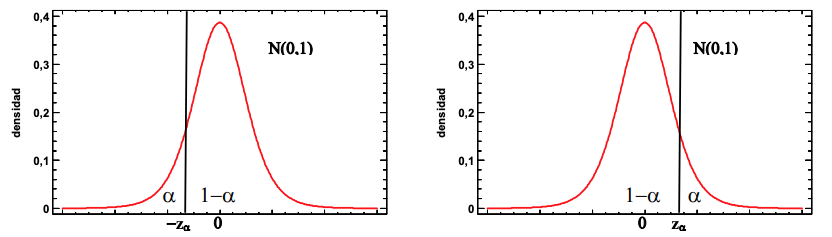

####Conflicto confianza - amplitud
Si aumentamos la confianza $1-\alpha$, aumenta $Z_{\alpha /2}$ y aumenta la amplitud o error máximo $E$

$$E = Z_{\alpha / 2}\frac{\sigma}{\sqrt{n}}$$

Se puede diseñar el tamaño muestral para conseguir la confianza y el error deseados:

$$n = \left(Z_{\alpha / 2}\frac{\sigma}{E}\right)^2$$

####Ejemplo
El editor de una revista profesional de ingeniería desea estimar el salario medio de los graduados en Ingeniería Industrial en su primer empleo. Se conoce que el Salario es una variable con ley normal y $\sigma$=250 €. Se toma una muestra de $n$=25 titulados de los que obtiene la información sobre su salario, resultando $\bar{X}$ = 1501.57 €.
1. Obtener un I.C. al 95% para $\mu$.
2. Obtener una cota inferior de confianza al 99% para $\mu$.
3. Qué tamaño de muestra se necesita en 1.) para que el error máximo sea de 50€.

In [ ]:
#Escriba su código aquí
#1.)


In [ ]:
#Escriba su código aquí
#2.)

In [ ]:
#Escriba su código aquí
#3.)

####Ejercicio
Un fabricante produce anillos para los pistones de un motor de automóvil. El diámetro de un anillo
es una variable aleatoria $X$ con distribución normal y desviación estándar $\sigma$ = 0.001 mm. Para una
muestra aleatoria de 15 anillos se observó un diámetro promedio $x$ = 74.036 mm. Obtenga un intervalo de confianza del 95$\%$ y 99$\%$ para el diámetro promedio, es decir $E(X)$.

In [ ]:
#Escriba su código aquí


####Ejercicio
LOs datos que a continuación se dan son los pesos en gramos de contenido de 16 cajas de cereal que se seleccionaron de un proceso de llenado con el propósito de verificar el peso promedio: 506, 508, 499, 503, 504, 510, 497, 512, 514, 505, 493, 496, 506, 502, 509, 496. Si el peso de cada caja es una variable aleatoria normal con una desviación estándar $\sigma$ = 5g, obtener los intervalos de confianza estimados del 90, 95 y 99$\%$, para la media de llenado de este proceso.

In [ ]:
#Escriba si código aquí


###Aplicación a la obtención de un I.C para $\sigma^2$ en el modelo $N(\mu, \sigma)$
1. Estimador $\sigma^2 = S^2$
2. Distribución del estimador:
$$\frac{(n-1)}{\sigma^2}S^2 \to \chi_{n-1}^2$$
3. Región de probabilidad $1 - \alpha$ bajo la distribución muestral

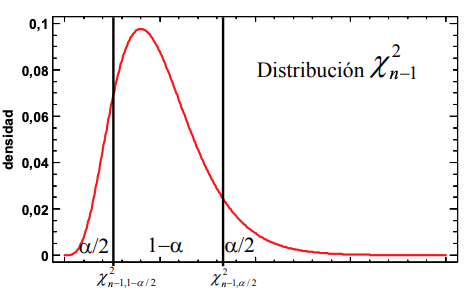

$$P\left(\chi_{n-1, 1-\alpha/2}^2 \leq \frac{(n-1)S^2}{\sigma^2} \leq \chi_{n-1,\alpha/2}^2\right) = 1 - \alpha$$

4. Despejar el parámetro $\sigma^2$
$$\frac{(n-1)}{\chi_{n-1,\alpha/2}^2}S^2 \leq \sigma^2 \leq \frac{(n-1)}{\chi_{n-1,1-\alpha/2}^2}S^2 \quad \mbox{con confianza }1-\alpha$$

Para obtener cotas de confianza dejamos todo el riesgo de error $\alpha$ en una cola:
* cota inferior de confianza $1 - \alpha$
$$P\left(\frac{(n-1)S^2}{\sigma^2} \leq \chi_{n-1,\alpha}^2 \right) = 1 - \alpha \implies \sigma^2 \geq \frac{(n-1)}{\chi_{n-1,\alpha}^2}S^2$$
* Cota superior de confianza $1 - \alpha$
$$P\left(\frac{(n-1)S^2}{\sigma^2} \geq \chi_{n-1,1-\alpha}^2 \right) = 1 - \alpha \implies \sigma^2 \leq \frac{(n-1)}{\chi_{n-1,1-\alpha}^2}S^2$$

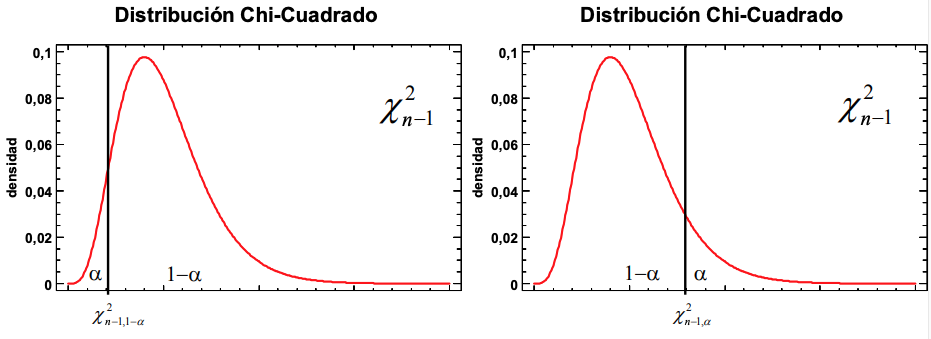

####Conflicto confianza - amplitud
Si aumentamos la confianza $1-\alpha$, aumenta $\chi_{n-1,\alpha /2}^2$ y disminuye $\chi_{n-1,1-\alpha /2}^2$ y por tanto aumenta la amplitud. En este caso no existe una fórmula explicita para el tamaño muestral.

####Ejemplo
Se investiga el diámetro de barras de acero fabricadas por máquinas de extrudado, que
sigue una distribución normal. Aunque el proceso funciona bien en cuanto al valor medio, se han
observado ciertas anomalías que llevan a pensar que tal vez hay algún desajuste que está haciendo
que la fabricación tenga mayor variabilidad de la debida con lo que un alto porcentaje del producto
puede resultar inservible. El parámetro de interés a controlar en este caso es la varianza. En
concreto se quiere que la varianza del proceso sea menor que 0.5 cm$^2$. Se dispone de una muestra de
tamaño $n$ = 18 tal que $\bar{X}$ = 8.63 cm y $S^2$ = 0.34. Con estos datos construimos una cota superior de
confianza del 95% obteniendo para $\sigma^2$: 

In [ ]:
#Escriba su código aquí


####Ejercicio
Una empresa está considerando la fabricación de un nuevo material sobre la base de ciertos cálculos teóricos de su departamento de desarrollo. La propiedad clave del material es su conductividad térmica, que interesa que sea lo menor posible y que el departamento de desarrollo
juzga como muy inferior a la del material actualmente utilizado. Para asegurarse, la empresa decide
fabricar un total de n=10 unidades del nuevo material. Se quiere obtener una cota superior de confianza para el valor medio de la conductividad térmica de ese material y la empresa además juzga asumible un riesgo $\alpha$=0.05. Supóngase normalidad. Los resultados muestrales obtenidos son
$$\bar{X}=44.21\mbox{ Btu/h - ft - $º$F}\quad\text{y}\quad S=0.1 \mbox{ Btu/h-ft-ºF.}$$

In [ ]:
#Escriba su código aquí


###Hipótesis Estadística
Una **Hipótesis Estadística** es una afirmación que se hace acerca de un parámetro poblacional. Por ejemplo, el tiempo de vida promedio para una persona diagnosticada con cáncer de pulmón es 180 días.

Una **hipótesis estadística** (H) es una proposición acerca de una característica de la población de estudio. Por ejemplo: "la variable $X$ toma valores en el intervalo (a; b)", "el valor de $\theta$ es 2", "la distribución de $X$ es normal", etc.





####Ejemplos
* Una compañía recibe un gran cargamento de piezas. Sólo acepta el envío si no hay mas de un 5% de piezas defectuosas. ¿Cómo tomar una decisión sin verificar todas las piezas?
* Se quiere saber si una propuesta de reforma legislativa es acogida de igual forma por hombres y mujeres. ¿Cómo se puede verificar esa conjetura?

Estos ejemplos tienen algo en común:
* Se formula la hipótesis sobre la población.
* Las conclusiones sobre la validez de la hipótesis se basarán en la
información de una muestra.

###Tipos de hipótesis estadísticas
####Hipótesis paramétricas
Una hipótesis paramétrica es una proposición sobre los valores que toma un parámetro.
* **Hipótesis simple**: aquella que especifica un único valor para el parámetro.
Ejemplo
$$H:\theta=0 \mbox{,} \quad H:\theta=-23\mbox{, etc.}$$
* **Hipótesis compuesta**: aquella que especifica un intervalo de valores para el parámetro.
Ejemplos
$$H:\theta\geq0\mbox{,} \quad H:1\leq \theta \leq 4\mbox{, etc.}$$
  **Hipótesis unilateral**: $H:\theta \leq 4$, $H:0 < \theta$

  **Hipótesis bilateral**: $H: \theta \neq 4 \iff H:\theta < 4 \quad \wedge\quad \theta > 4 $

####Hipótesis no paramétricas
Una hipótesis no paramétrica es una
proposición sobre cualquier otra característica de la población.
Ejemplos
$$H:X\sim N \quad \mbox{No lo veremos en este curso!!}$$


####Hipótesis nula y alternativa
**Hipótesis nula**: es la afirmación que está establecida y que se espera sea rechazada después de aplicar una prueba estadística. Esta se representa con $H_0$.

* Es una idea es similar a la presunción de inocencia en un juicio.
* La hipótesis nula siempre contiene los signos "$=$", "$\leq$" o "$\geq$".
* La hipótesis nula se acepta, se rechaza o no se rechaza.

**Hipótesis alterna**: es la afirmación que se espera sea aceptada después de aplicar una prueba estadística. Esta se representa por $H_A$ (también se conoce como $H_1$ y es la negación de $H_0$).
* Es generalmente la hipótesis que se quiere verificar.
* La hipótesis alternativa **nunca** contiene los signos "$=$", "$\leq$" o "$\geq$".
* La hipótesis alternativa puede aceptarse o no aceptarse.


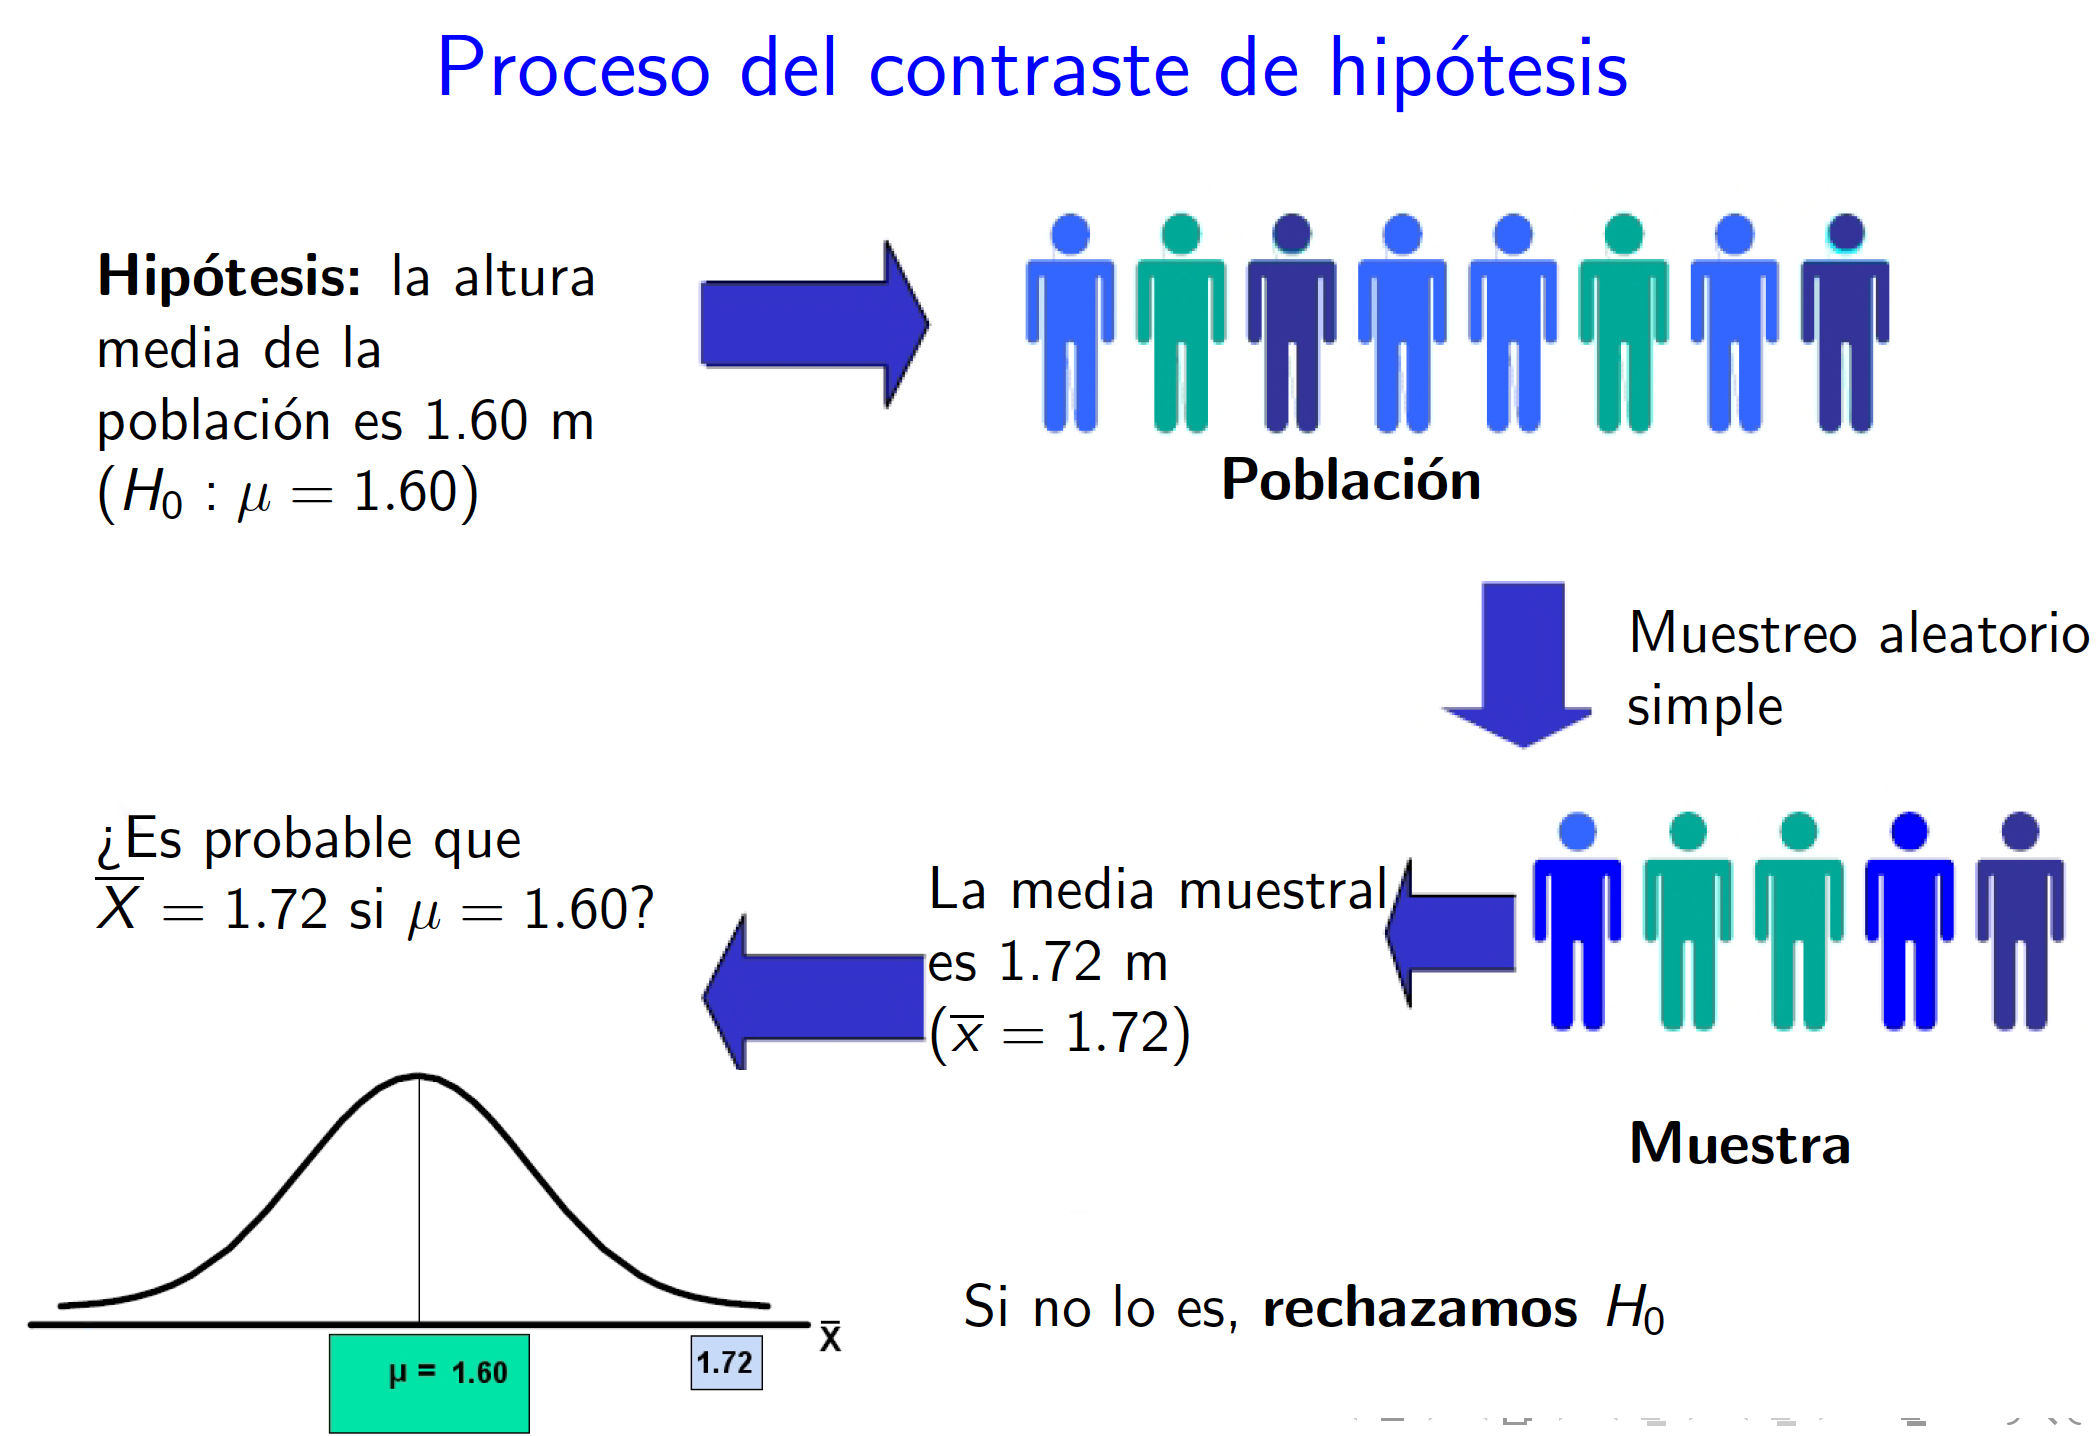

Si $H_0$ es cierta, la mayoría de los valores de la
media muestral deben estar próximos al valor $\mu$.

### Región crítica y nivel de significación
Un contraste de hipótesis es una regla que determina, a un cierto nivel de significación, $\alpha$, para qué valores de la muestra se rechaza o no se rechaza la hipótesis nula.

Se trata de determinar, a un nivel de significación $\alpha$, una región crítica o de rechazo, $RC_{\alpha}$, y una región de aceptación, $RA_{\alpha}$.

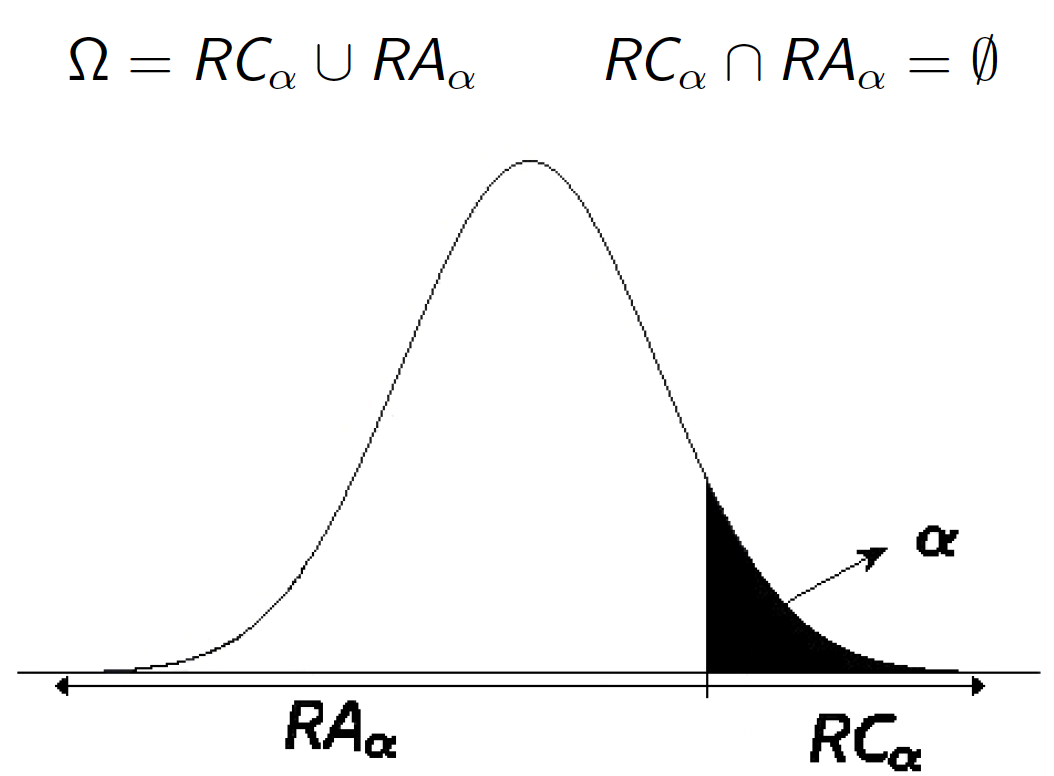

El **estadístico del contraste** es un estadístico que se construye a partir de un estimador del parámetro y cuya distribución bajo $H_0$ es conocida.

El nivel de significación es la probabilidad de que, bajo $H_0$, el estadístico del contraste tome valores en la $RC_{\alpha}$.

Si la hipótesis alternativa da lugar a una región crítica a ambos lados del valor del parámetro, entonces la región de rechazo se encuentra a $\alpha/2$.

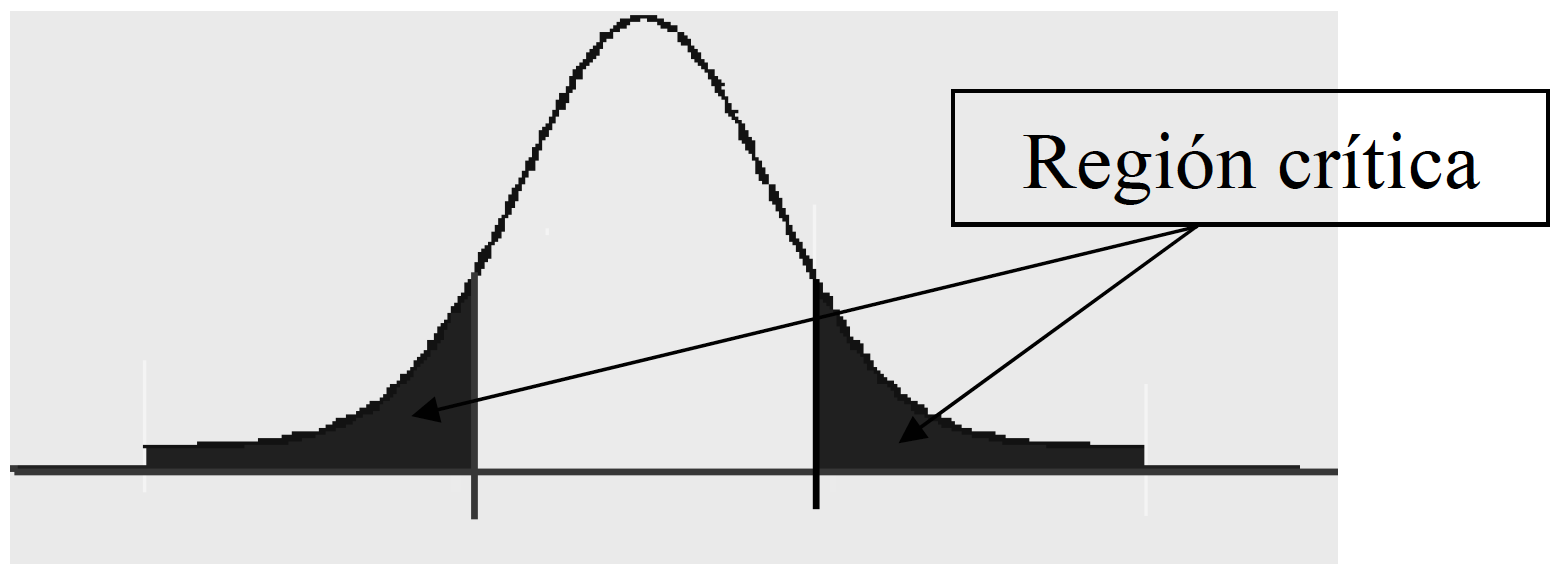

Si la hipótesis alternativa da lugar a una región crítica "a un solo lado del valor del parámetro".
* Si $H_0: \theta \leq \theta_0$ y $H_1: \theta > \theta_0$ ($RC_{\alpha}$ derecha)
* Si $H_0: \theta \geq \theta_0$ y $H_1: \theta < \theta_0$ ($RC_{\alpha}$ izquierda)

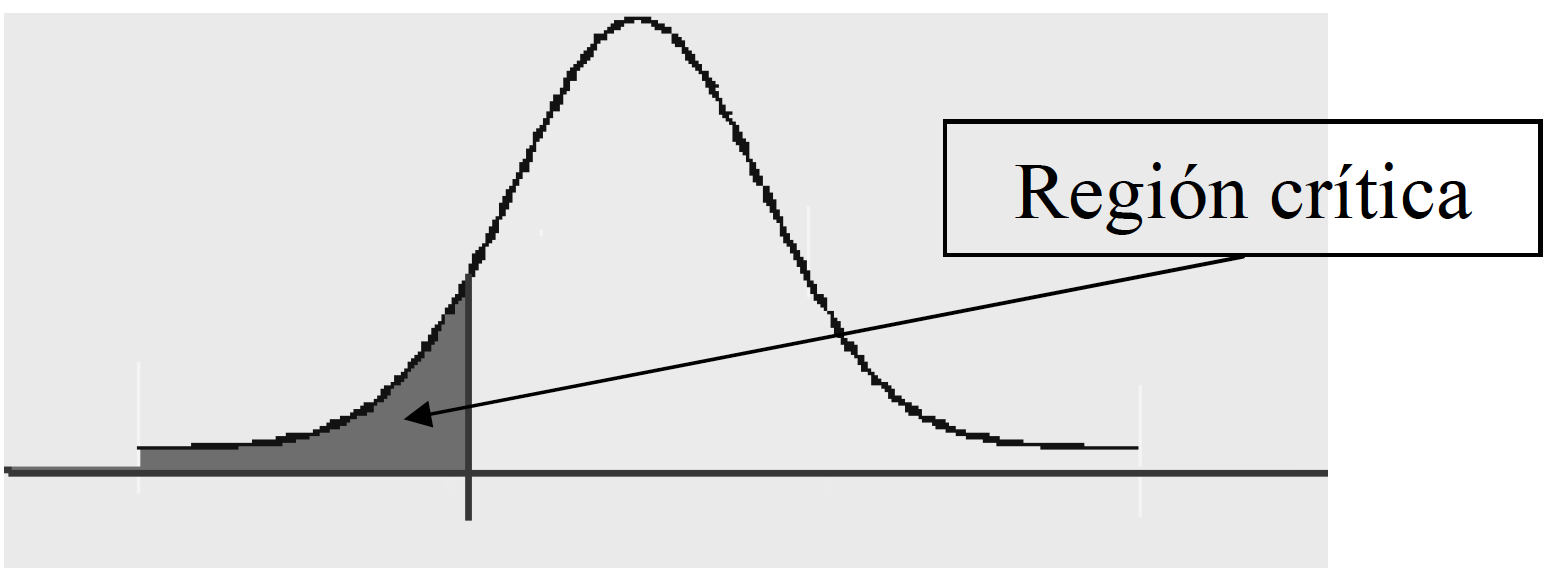

####Ejemplo
Sea $X \sim N(\mu,5)$. Queremos hacer contrastes sobre la media poblacional $\mu$.

Estadístico (*común para los tres contrastes*): $Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \sim N(0,1)$

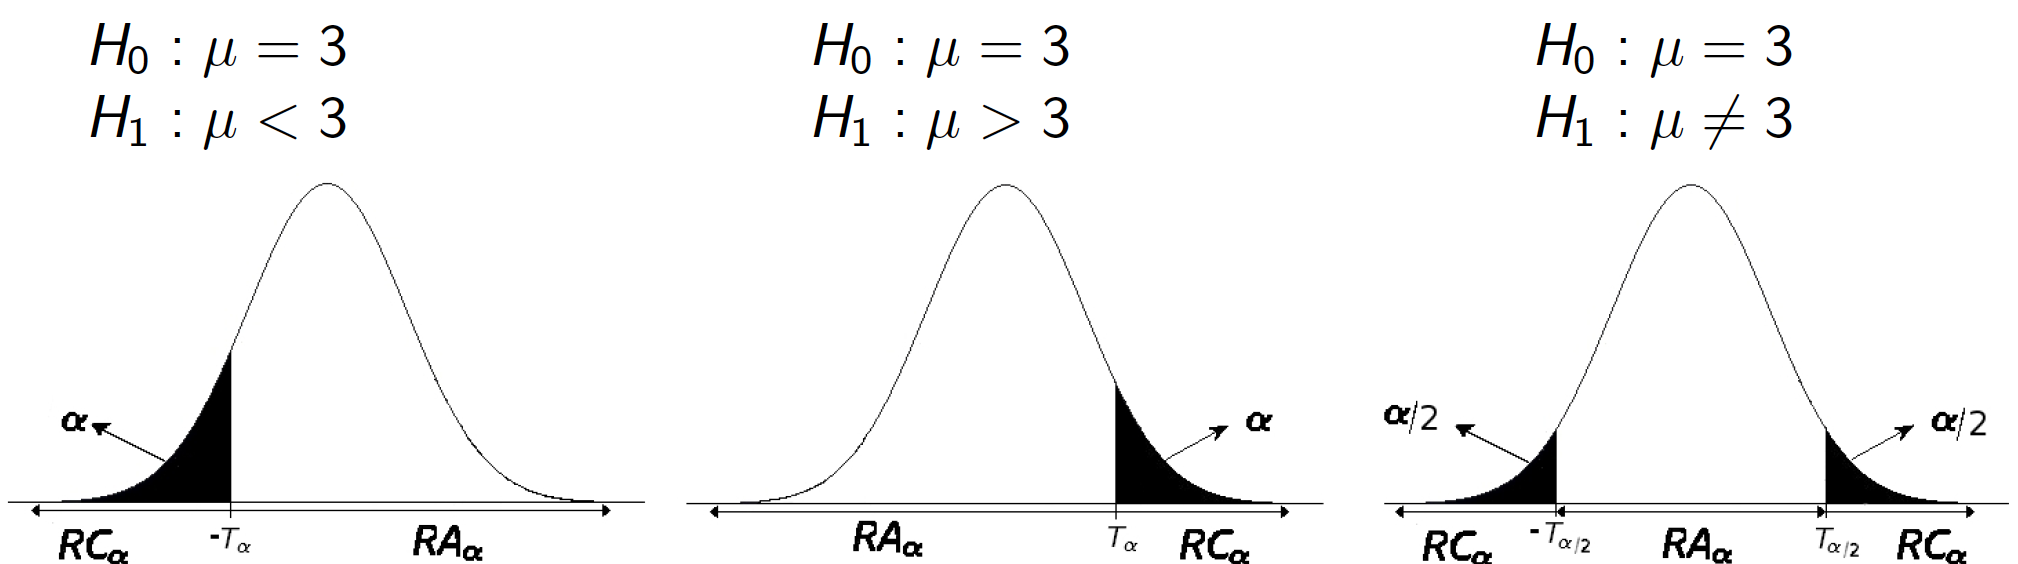

####Ejemplo
En cursos pasados, el número medio de préstamos por año y por alumno en la
biblioteca ha sido de 6. Este año la biblioteca ha hecho una
campaña de información y quiere saber el efecto que esta ha tenido entre los estudiantes.
1. ¿Cuáles serán las hipótesis nula y alternativa en este caso?
2. Si se toma una m.a.s de 100 alumnos y se obtiene $\bar{X} = 6.23$, $S=2.77$ ¿Cuál será la región crítica para el contraste $H_0: \mu = 6$ y $H_1: \mu > 6$ con un nivel de significación 0.05?.

1. $H_0: \mu = 6$ y $H_1: \mu > 6$.
2. Debemos hacer la transformación a una distribución normal estándar $Z \sim N(0,1)$.


In [ ]:
#Escriba su código aquí

###Tipos de errores en un contraste de hipótesis


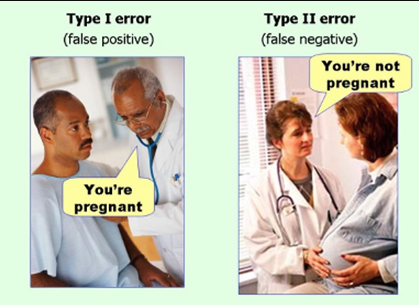

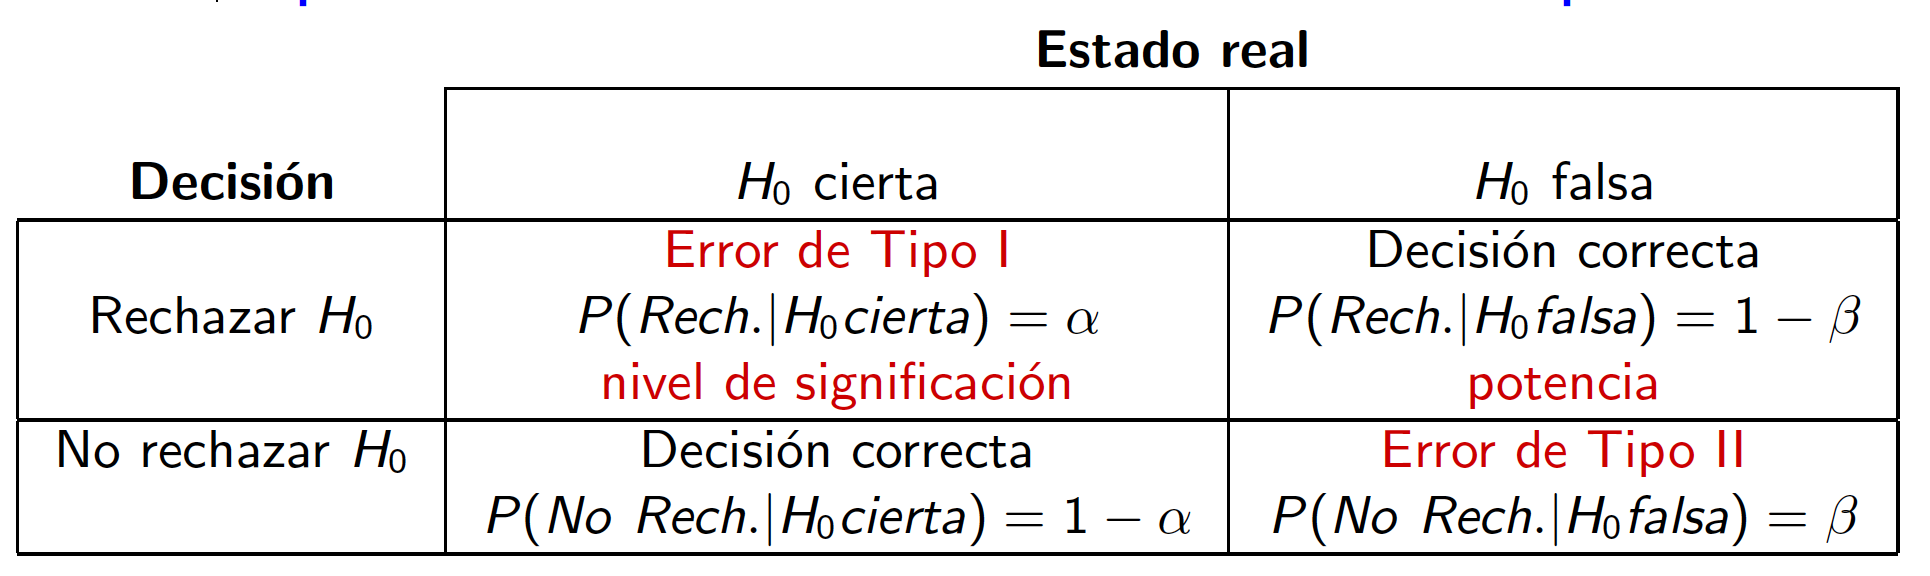

* Podemos hacer la probabilidad del error de tipo I tan pequeña como queramos, PERO esto hace que aumente la probabilidad del error de tipo II.
* Un contraste de hipótesis puede rechazar la hipótesis nula pero NO puede probar la hipótesis nula.
* Si no rechazamos la hipótesis nula, es porque las observaciones no han aportado evidencia para descartarla, no porque sea neceseariamente cierta.
* Por el contrario, si rechazamos la hipótesis nula es porque se está
razonablemente seguro de que $H_0$ es falsa y estamos aceptando implícitamente la hipótesis alternativa.

###Nivel crítico o p-valor
El nivel crítico, p, o p-valor es el nivel de significación más pequeño para el que la muestra particular obtenida obligaría a rechazar la hipótesis nula. Es decir:
$$p = P(\mbox{Rech. }H_0\mbox{ para }x_1,\ldots,x_n|H_0\mbox{ cierta})$$

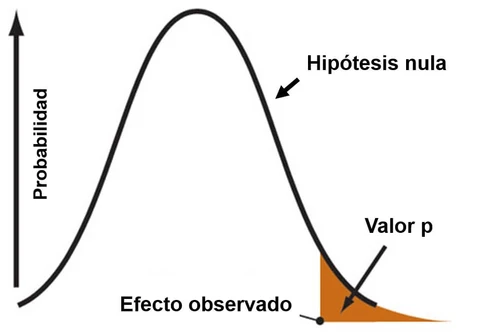

####Ejemplo (continuación)
Para los datos del ejemplo, $n = 100$, $\bar{X} = 6.23$, $S = 2.77$,
al nivel de significación $0.05$, no rechazamos la hipótesis nula. ¿Cuál es el p-valor para esta muestra?

In [ ]:
#Escriba su código aquí
